In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')


In [453]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv', index_col=0)

df['Gender'].fillna('Other', inplace=True)

In [454]:
df = df[df['Salary'].isna() == False]
df = df[df['Country'].isna() == False]

Text(0, 0.5, 'Count')

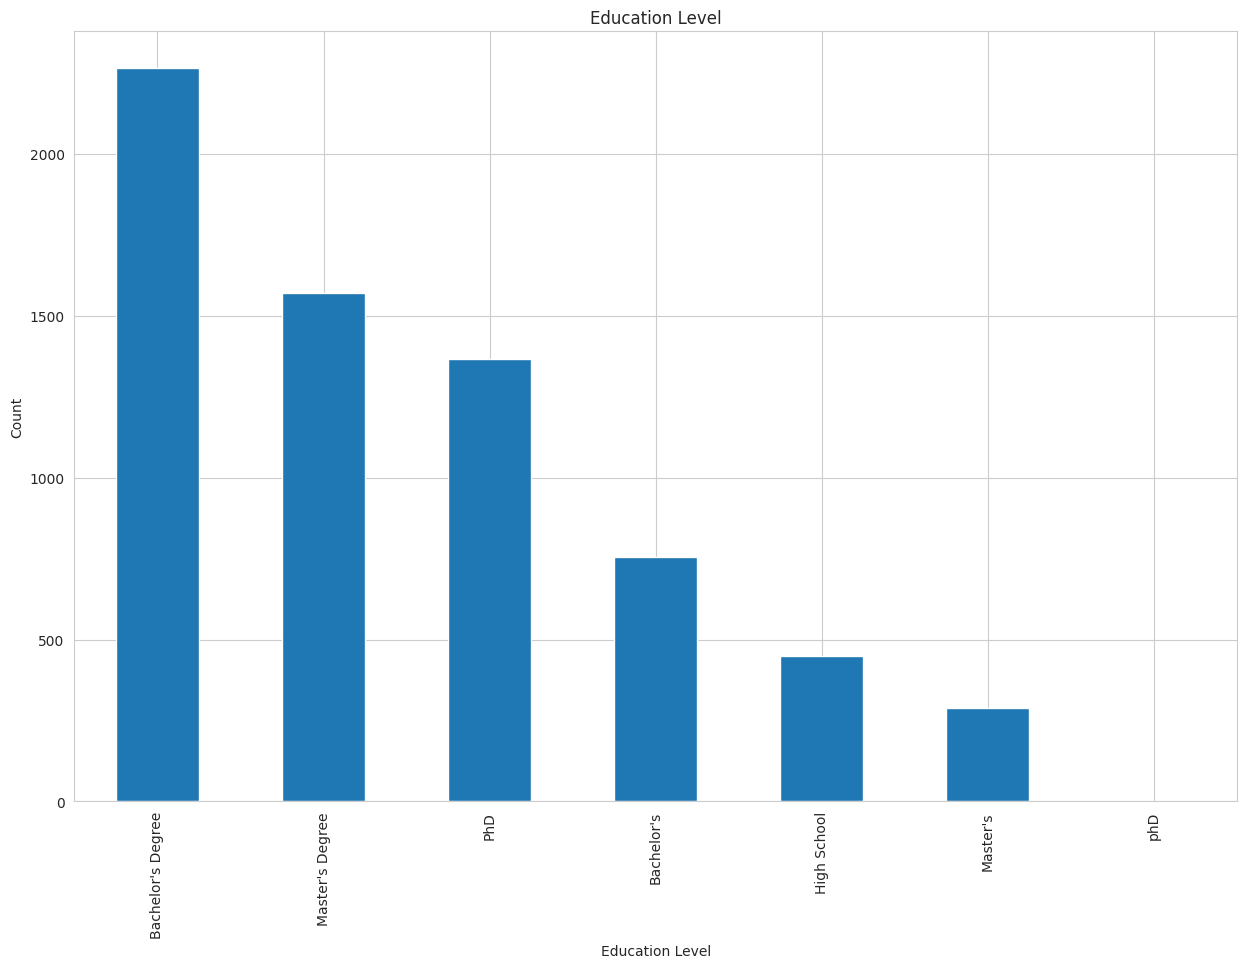

In [455]:
df['Education Level'].value_counts().plot(kind='bar', figsize=(15,10))
plt.title('Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

In [456]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

In [457]:
df["Education Level"] = df["Education Level"].fillna("Other").replace(
    ["Bachelor's", "Master's", "phD"], ["Bachelor's Degree", "Master's Degree", "PhD"]
)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


<Axes: title={'center': 'Salary by Gender and Country'}, xlabel='Education Level', ylabel='Salary'>

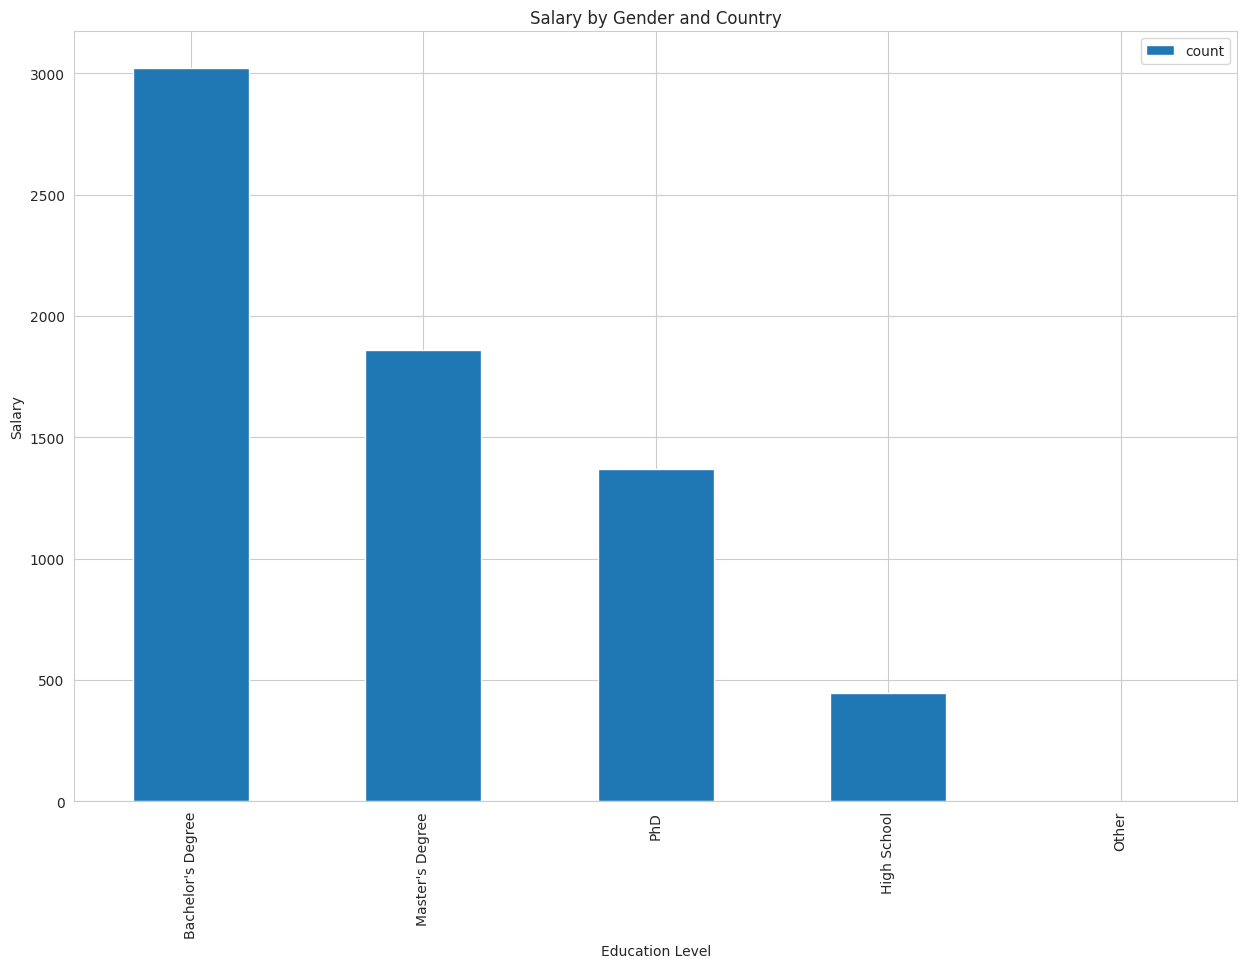

In [458]:
df["Education Level"].value_counts().plot(
    kind="bar",
    figsize=(15, 10),
    legend=True,
    ylabel="Salary",
    title="Salary by Gender and Country",
)

<Axes: title={'center': 'Salary by Gender and Country'}, xlabel='Education Level', ylabel='Salary'>

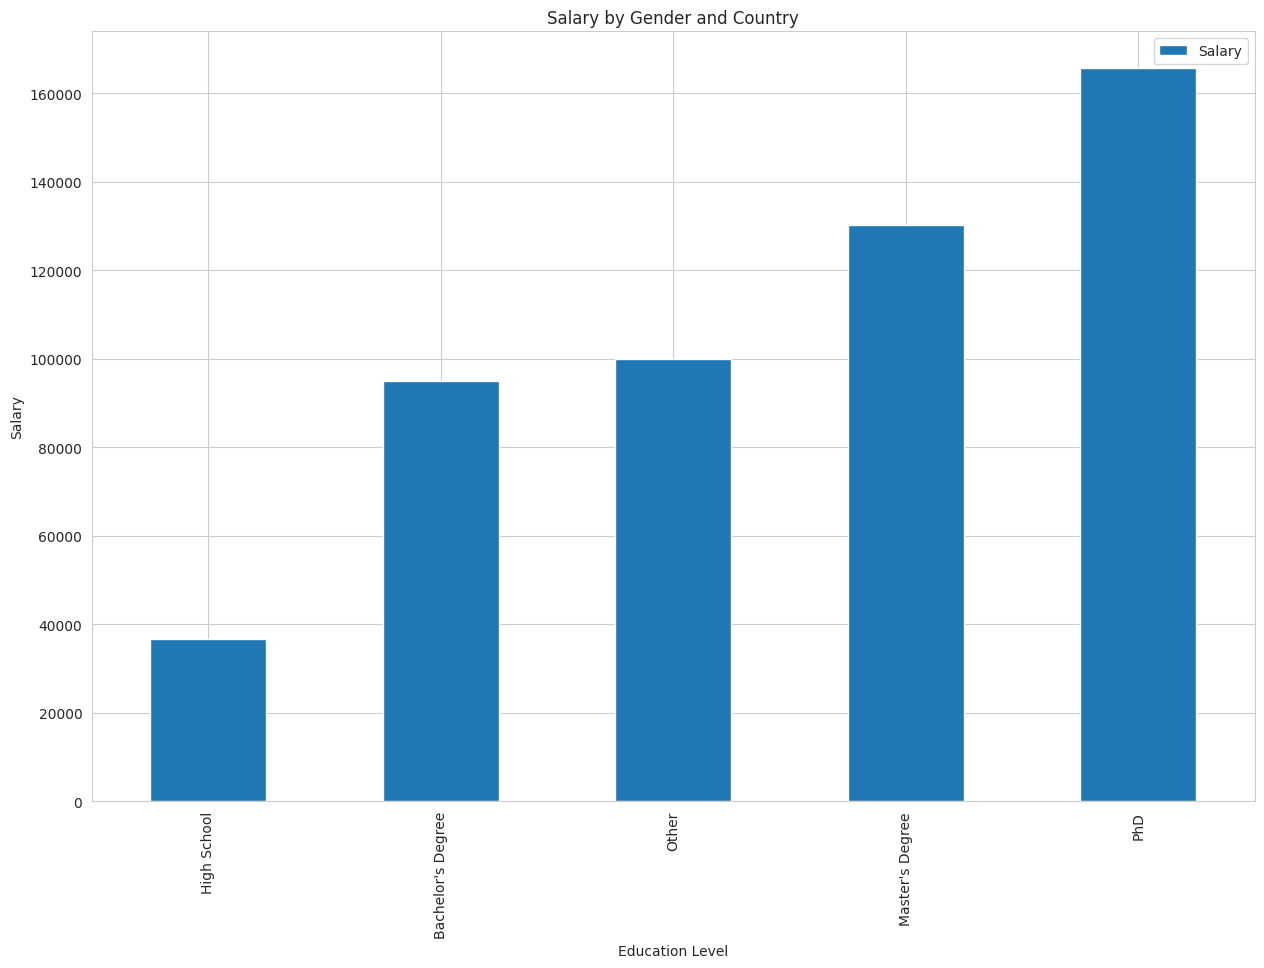

In [459]:
df.groupby(df['Education Level'])[["Salary"]].mean().sort_values("Salary").plot(
    kind="bar",
    figsize=(15, 10),
    legend=True,
    ylabel="Salary",
    width=0.5,
    title="Salary by Gender and Country",
)

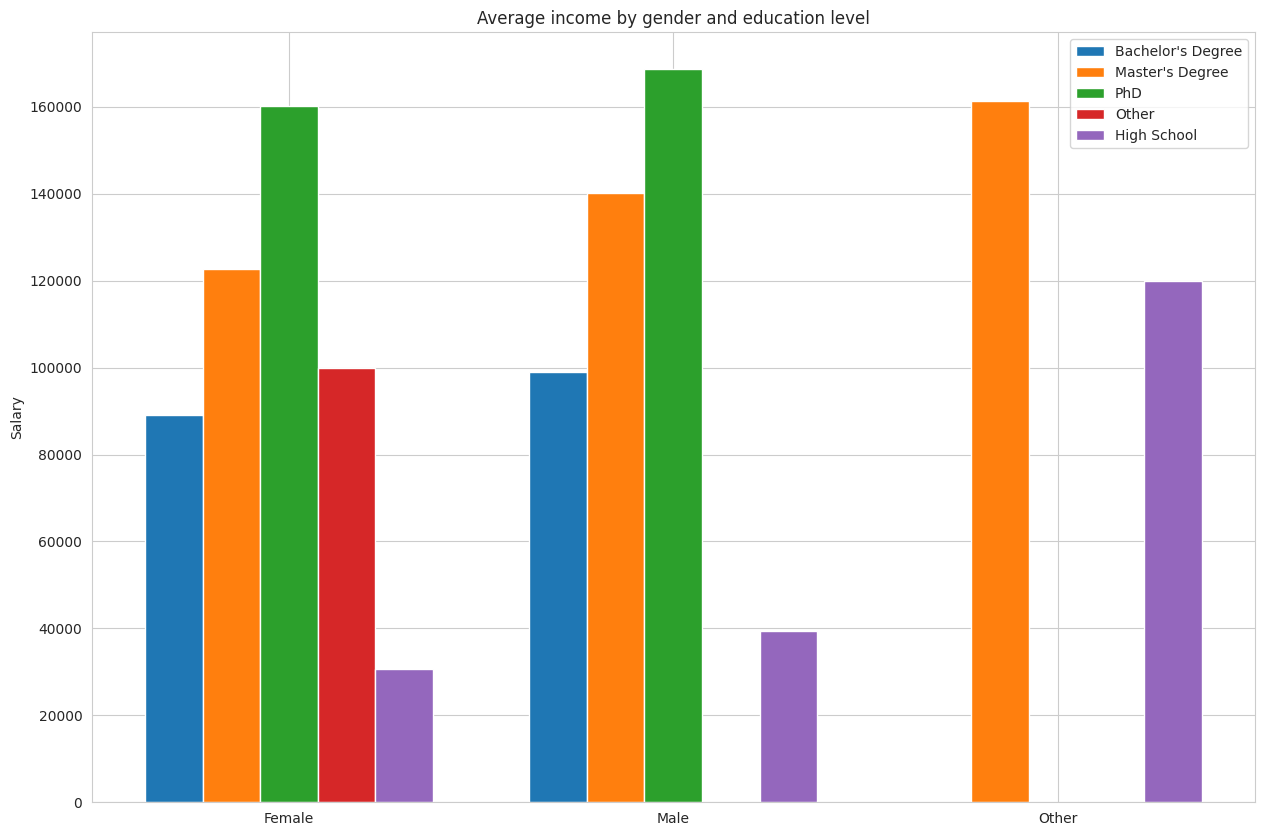

In [460]:
groups = (
    df.groupby([df["Education Level"], df["Gender"]])[["Salary"]]
    .mean()
    .sort_values(["Gender"])
)

levels = df["Education Level"].unique()

plt.figure(figsize=(15, 10))
plt.ylabel("Salary")
plt.title("Average income by gender and education level")

index = 0
width = 0.15
bars = []
for level in levels:
    X_axis = np.arange(len(groups.loc[level].index))
    bars.append(
        plt.bar(
            X_axis + width * index,
            groups.loc[level]["Salary"],
            0.15,
            label=level,
            align="center",
        )
    )
    index += 1
    plt.xticks(X_axis + width * 2, groups.loc[level].index.sort_values())

plt.legend()
plt.show()

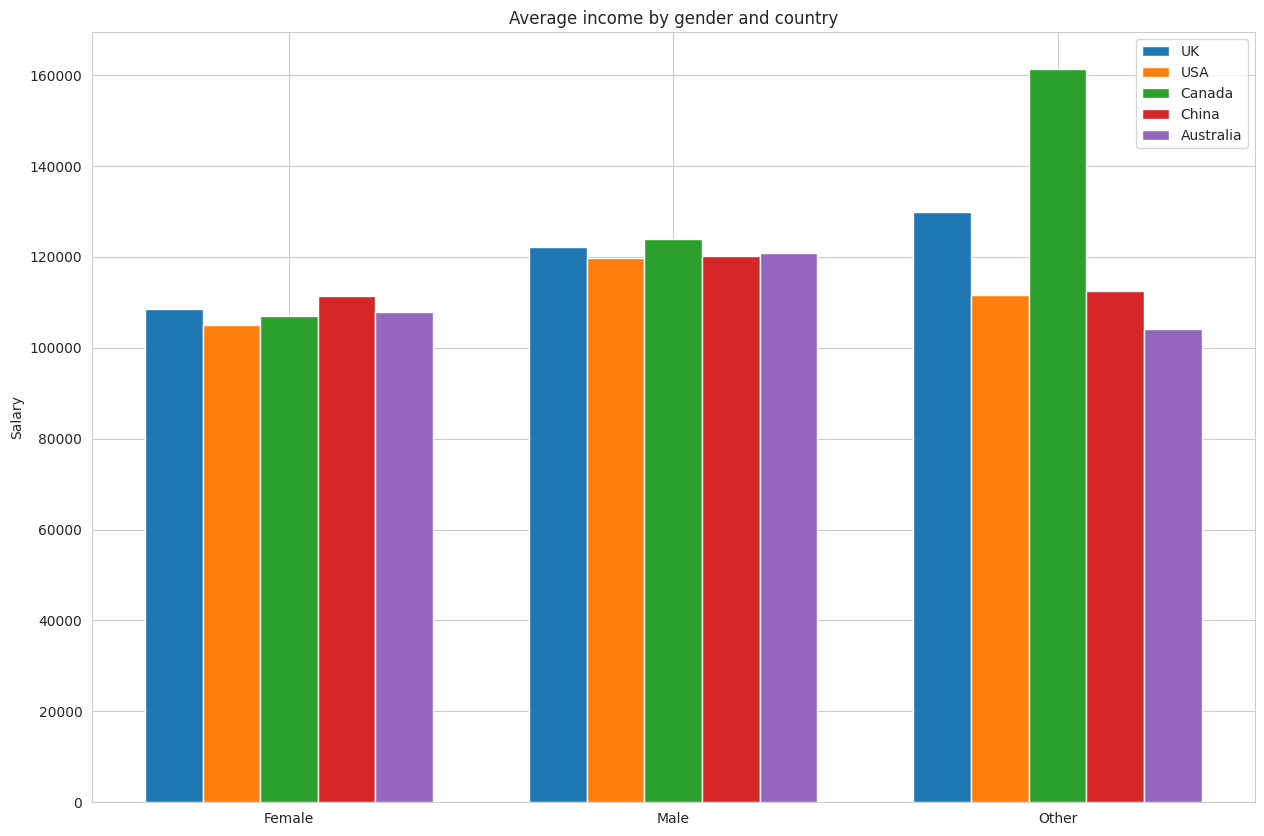

In [461]:
groups = (
    df.groupby([df["Country"], df["Gender"]])[["Salary"]]
    .mean()
    .sort_values(["Gender"])
)

countries = df["Country"].unique()

plt.figure(figsize=(15, 10))
plt.ylabel("Salary")
plt.title("Average income by gender and country")

index = 0
width = 0.15
bars = []
for country in countries:
    X_axis = np.arange(len(groups.loc[country].index))
    bars.append(
        plt.bar(
            X_axis + width * index,
            groups.loc[country]["Salary"],
            0.15,
            label=country,
            align="center",
        )
    )
    index += 1

plt.xticks(X_axis + width * 2, groups.loc[country].index)
plt.legend()
plt.show()

In [462]:
df_males = df[df["Gender"] == "Male"]
df_females = df[df["Gender"] == "Female"]

male_salaries = df_males["Salary"].values
female_salaries = df_females["Salary"].values

df.describe()

,Age,Years of Experience,Salary
count,6699.000000,6699.000000,6699.000000
mean,33.622033,8.095014,115326.964771
std,7.615646,6.059853,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [463]:
from scipy import stats
import pandas as pd
# Normatility test
# Null hypothesis: the data is normally distributed
# Alternative hypothesis: the data is not normally distributed
# p-value < 0.05: reject the null hypothesis
print("Male Salaries p-value: {}".format(stats.normaltest(male_salaries).pvalue))
print("Females Salaries p-value: {}".format(stats.normaltest(female_salaries).pvalue))

# Rejected the null hypothesis, the data is not normally distributed

Male Salaries p-value: 0.0
Females Salaries p-value: 0.0


In [464]:
# Mann-Whitney U Test for Salary Data
# Null Hypothesis: One set of salary data is not statistically different from the other
# Alternative Hypothesis: One set of salary data is statistically different from the other

print(stats.mannwhitneyu(male_salaries, female_salaries).pvalue)

# p value is less than 0.05, so we reject the null hypothesis and accept the alternative hypothesis

7.736568380906579e-25


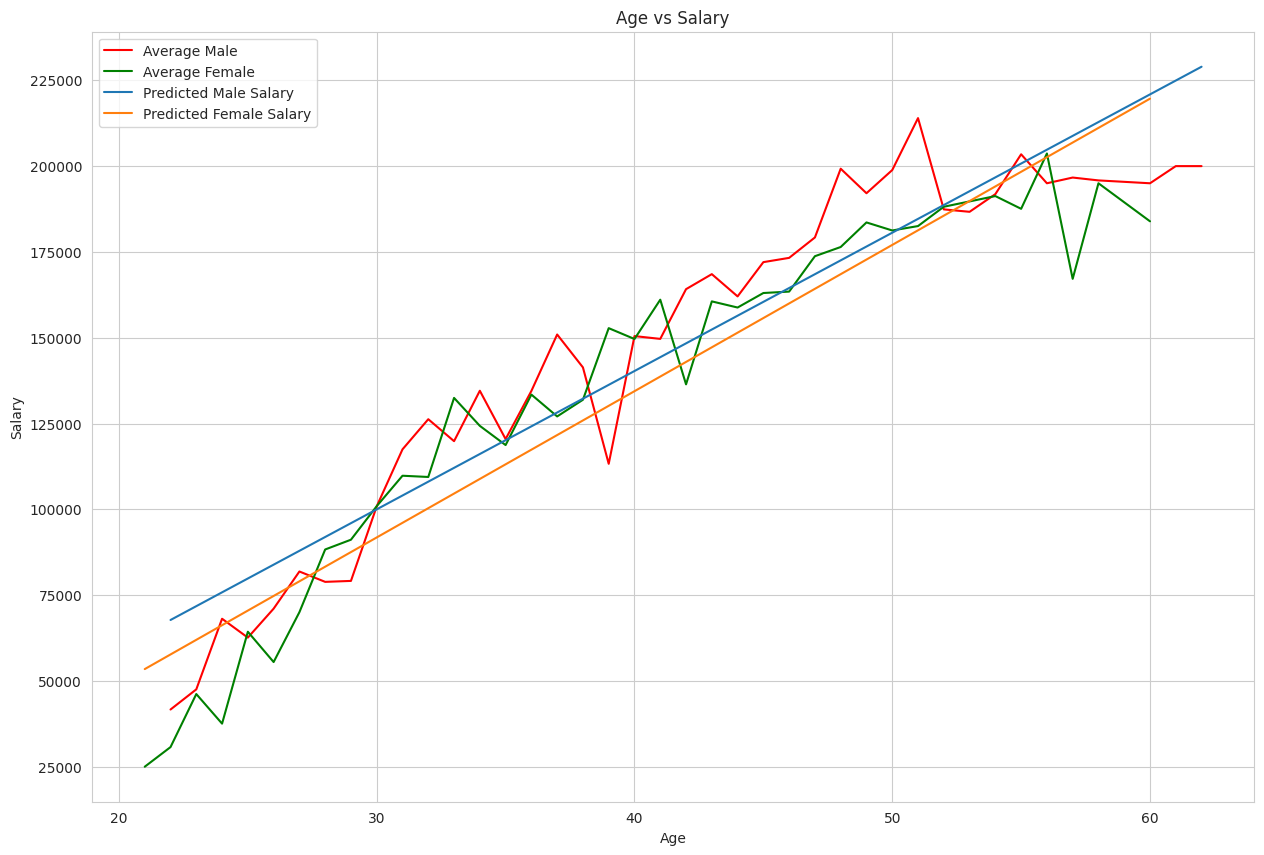

In [475]:
from sklearn.linear_model import LinearRegression


df_male_average_by_age = df_males[["Salary", "Age"]].groupby(df_males["Age"]).mean()
df_females_average_by_age = (
    df_females[["Salary", "Age"]].groupby(df_females["Age"]).mean()
)

model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=True)
model1.fit(df_male_average_by_age[["Age"]], df_male_average_by_age["Salary"])
model2.fit(df_females_average_by_age[["Age"]], df_females_average_by_age["Salary"])

plt.figure(figsize=(15, 10))
# plt.scatter(df_males["Age"], df_males["Salary"])
# plt.scatter(df_females["Age"], df_females["Salary"])
plt.plot(df_male_average_by_age["Age"], df_male_average_by_age["Salary"], color="red")
plt.plot(
    df_females_average_by_age["Age"], df_females_average_by_age["Salary"], color="green"
)
plt.plot(df_male_average_by_age["Age"], model1.predict(df_male_average_by_age[["Age"]]))
plt.plot(
    df_females_average_by_age["Age"], model2.predict(df_females_average_by_age[["Age"]])
)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.legend(
    [
        # "Males",
        # "Females",
        "Average Male",
        "Average Female",
        "Predicted Male Salary",
        "Predicted Female Salary"
    ]
)

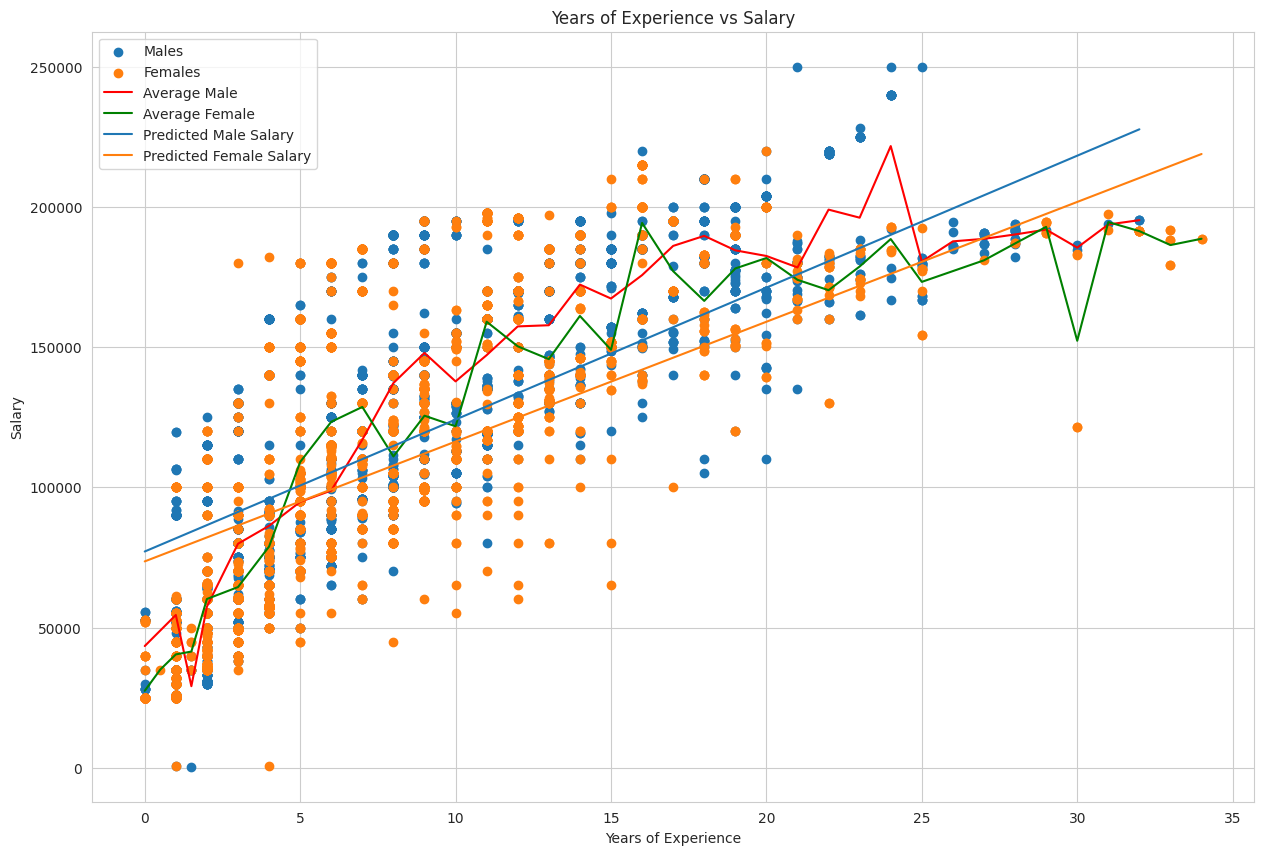

In [478]:
df_male_average_by_age = (
    df_males[["Salary", "Years of Experience"]]
    .groupby(df_males["Years of Experience"])
    .mean()
)
df_females_average_by_age = (
    df_females[["Salary", "Years of Experience"]]
    .groupby(df_females["Years of Experience"])
    .mean()
)

model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=True)
model1.fit(df_male_average_by_age[["Years of Experience"]], df_male_average_by_age["Salary"])
model2.fit(df_females_average_by_age[["Years of Experience"]], df_females_average_by_age["Salary"])


plt.figure(figsize=(15, 10))
plt.plot(
    df_male_average_by_age["Years of Experience"],
    df_male_average_by_age["Salary"],
    color="red",
)
plt.plot(
    df_females_average_by_age["Years of Experience"],
    df_females_average_by_age["Salary"],
    color="green",
)
plt.plot(
    df_male_average_by_age["Years of Experience"],
    model1.predict(df_male_average_by_age[["Years of Experience"]]),
)
plt.plot(
    df_females_average_by_age["Years of Experience"],
    model2.predict(df_females_average_by_age[["Years of Experience"]]),
)

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend(
    [
        "Average Male",
        "Average Female",
        "Predicted Male Salary",
        "Predicted Female Salary",
    ]
)